<center><h1>Python Pandas Tutorial</h1><center>

## Pandas is Python Data Analysis Library

pandas is an open source, BSD-licensed(can use for commercial means) library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

* Widely used
* Open Source
* Active Development
* Great Documentation

Home Page: http://pandas.pydata.org/

Using Documentation from: http://pandas.pydata.org/pandas-docs/stable/

Fantastic Cheat Sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

Best book by Panda's creator Wes Kinney (3rd Edition 2022): https://wesmckinney.com/book/

In [2]:
import pandas as pd

In [3]:
#pd.reset_option('display.max_rows')
pd.options.display.max_rows = 40

In [ ]:
# Pandas is a big package took a while...

In [4]:
import numpy as np # another big library with various numeric functions

In [5]:
import matplotlib.pyplot as plt

# Panda's two fundamental data structures: Series and DataFrame.

### Series
A Series is a one-dimensional array-like object containing a sequence of values (
similar types to NumPy types) and an associated array of data labels - index.
Simplest Series is from an array of data.

In [ ]:
# Let's create some Series!

In [6]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [7]:
s + 4

0    5.0
1    8.0
2    7.5
3    7.0
4    NaN
5    4.0
6   -1.0
dtype: float64

In [ ]:
# NaN = Not a Number (used for missing numerical values)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [8]:
s2 = s * 4 
s2

0     4.0
1    16.0
2    14.0
3    12.0
4     NaN
5     0.0
6   -20.0
dtype: float64

In [9]:
s2**2

0     16.0
1    256.0
2    196.0
3    144.0
4      NaN
5      0.0
6    400.0
dtype: float64

In [ ]:
### Often you want Series with an index identifying each data point with a label 

In [10]:
labeledSeries = pd.Series([24, 77, -35, 31], index=['d', 'e', 'a', 'g'])
labeledSeries

d    24
e    77
a   -35
g    31
dtype: int64

In [ ]:
## A  bit similar to dictionary isn't it?


In [11]:
labeledSeries['g']

np.int64(31)

In [12]:
labeledSeries.index

Index(['d', 'e', 'a', 'g'], dtype='object')

In [13]:
labeledSeries.values

array([ 24,  77, -35,  31])

In [14]:
labeledSeries[['a','d']] # NOTE double list brackets!!

a   -35
d    24
dtype: int64

In [15]:
labeledSeries > 30

d    False
e     True
a    False
g     True
dtype: bool

In [16]:
# select values via a boolean array
labeledSeries[labeledSeries > 30]

e    77
g    31
dtype: int64

In [ ]:
# So Series behaves like a fixed-length, ordered dictionary with extra helper methods

In [17]:
'd' in labeledSeries

True

### Can create series from dictionary by simply passing to constructor pd.Series(mydict)

In [18]:
citydict = {'Riga': 650000, 'Tukums':20000, 'Ogre': 25000, 'Carnikava': 3000}
citydict

{'Riga': 650000, 'Tukums': 20000, 'Ogre': 25000, 'Carnikava': 3000}

In [19]:
cseries = pd.Series(citydict)
cseries

Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
dtype: int64

In [20]:
## Overwriting default index
clist = ['Jurmala', 'Riga', 'Tukums', 'Ogre', 'Daugavpils']
cseries2 = pd.Series(citydict, index = clist)
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [ ]:
# notice Carnikava was lost, since our index did not have it!
# and order was preserved from the given index list!

In [21]:
# For missing data
cseries2.isnull()

Jurmala        True
Riga          False
Tukums        False
Ogre          False
Daugavpils     True
dtype: bool

In [22]:
cseries2.dropna()

Riga      650000.0
Tukums     20000.0
Ogre       25000.0
dtype: float64

In [24]:
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [25]:
cseries3 = cseries + cseries2
cseries3

Carnikava           NaN
Daugavpils          NaN
Jurmala             NaN
Ogre            50000.0
Riga          1300000.0
Tukums          40000.0
dtype: float64

In [ ]:
# So NaN + number = NaN

In [26]:
cseries.name = "Latvian Cities"
cseries.index.name = "City"
cseries

City
Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
Name: Latvian Cities, dtype: int64

In [27]:
cseries.index

Index(['Riga', 'Tukums', 'Ogre', 'Carnikava'], dtype='object', name='City')

In [28]:
cseries.index = ['CarnikavaIsNotaCity','OgreEatsHumans', 'RigaIsOld', 'TukumsSmukums']
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld               25000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [29]:
# Series values are mutable
cseries['RigaIsOld']=625000
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [30]:
# How to rename individual index elements?
cseries.index[2]='RigaIsOldButFantastic'
cseries

TypeError: Index does not support mutable operations

In [ ]:
# We use Renaming method to rename individual elements

In [31]:
cseries.rename(index={'RigaIsOld':'RigaRocks'})

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaRocks              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

### Integer (Position-based) vs Label-based Indexes

Working with pandas objects indexed by integers is something that often trips up
new users due to some differences with indexing semantics on built-in Python data
structures like lists and tuples. For example, you might not expect the following code
to generate an error:



In [32]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [33]:
ser[-1]

KeyError: -1

In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in
general without introducing subtle bugs. 

Here we have an index containing 0, 1, 2,
but inferring what the user wants (label-based indexing or position-based) is difficult:


In [34]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
## With a non-integer index there is no potential for ambiguity:

In [35]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

/var/folders/lp/4x3s75t55cbf6dq_k1jcxllm0000gn/T/ipykernel_67882/2842014175.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser2[-1]


np.float64(2.0)

In [ ]:
ser2[::-1]

In [ ]:
## To keep things consistent, if you have an axis index containing integers, data selection
##will always be label-oriented. 

# For more precise handling, use loc (for labels) or iloc (for integers):

In [36]:
ser2.loc['b']

np.float64(1.0)

In [37]:
# Note: label indexing includes the endpoint, integer indexing does not
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [38]:
ser.iloc[:1]

0    0.0
dtype: float64

In [39]:
ser.iloc[-1]

np.float64(2.0)

* loc gets rows (or columns) with particular labels from the index.

* iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

# Date Range creation

Date ranges are used as indexes for time series data:
* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#time-series

In [40]:
dates = pd.date_range('20180521', periods=15)
dates

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.date_range('20210422', periods=15, freq="W")

DatetimeIndex(['2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01'],
              dtype='datetime64[ns]', freq='W-SUN')

In [42]:
pd.date_range('20200416', periods=7, freq="W-THU")

DatetimeIndex(['2020-04-16', '2020-04-23', '2020-04-30', '2020-05-07',
               '2020-05-14', '2020-05-21', '2020-05-28'],
              dtype='datetime64[ns]', freq='W-THU')

In [ ]:
# more on data_range frequency here
# https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

In [43]:
# Datetime is in the standard library (so all Python installations will have it)
from datetime import date
date.today()

datetime.date(2025, 5, 16)

In [44]:
# We can get a data range starting from today
months = pd.date_range(date.today().strftime("%Y-%m-%d"), periods = 10, freq='BMS')
months

DatetimeIndex(['2025-06-02', '2025-07-01', '2025-08-01', '2025-09-01',
               '2025-10-01', '2025-11-03', '2025-12-01', '2026-01-01',
               '2026-02-02', '2026-03-02'],
              dtype='datetime64[ns]', freq='BMS')

## Reading data files

In [45]:
city_data = pd.read_csv("data/iedz_skaits_2018.csv", index_col=0)
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [46]:
type(city_data)

pandas.core.frame.DataFrame

In [47]:
city_series = city_data.squeeze()
type(city_series)

pandas.core.series.Series

In [48]:
city_series.head()

Teritoriālā vienība
Rīga          637971
Daugavpils     83250
Jelgava        56383
Jēkabpils      22188
Jūrmala        49073
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [49]:
city_series["Salaspils"]

np.int64(18071)

In [50]:
city_series.sum()

np.int64(2254964)

In [51]:
city_series.describe()

count       186.000000
mean      12123.462366
std       47444.415575
min         503.000000
25%        2660.750000
50%        5238.500000
75%        9831.750000
max      637971.000000
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: float64

In [52]:
city_series[city_series < 1000]

Teritoriālā vienība
Staicele     877
Ape          850
Durbe        503
Subate       635
Līgatne      994
Pāvilosta    894
Ainaži       689
Piltene      903
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [54]:
bitmap = city_series < 1000
bitmap.sample(20)   # kādēļ sample() nevis head()

Teritoriālā vienība
Salaspils              False
Ape                     True
Stende                 False
Priekuļu novads        False
Olaines novads         False
Krimuldas novads       False
Talsu novads           False
Vecpiebalgas novads    False
Ropažu novads          False
Mazsalaca              False
Lielvārde              False
Zilupe                 False
Ikšķile                False
Dobeles novads         False
Kandava                False
Ķegums                 False
Aknīstes novads        False
Subate                  True
Viesīte                False
Valka                  False
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: bool

In [55]:
city_series[bitmap].sort_index()

Teritoriālā vienība
Ainaži       689
Ape          850
Durbe        503
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Subate       635
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [56]:
city_series[bitmap].sort_values(ascending=False)

Teritoriālā vienība
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Ape          850
Ainaži       689
Subate       635
Durbe        503
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns. 

Each column can be a different value type (numeric, string,
boolean, etc.). 

The DataFrame has both a row and column index;

Think of it 
as an ordered dict of Series all sharing the same row index. 

Underneath data is stored as one or more two-dimensional blocks (similar to ndarray) 
rather than a list, dict, or some other collection of
one-dimensional arrays.

In [ ]:
# Many ways of Data Frame creation
# One common way is from a dict of equal-length lists or NumPy arrays

In [57]:
data = {'city': ['Riga', 'Riga', 'Riga', 'Jurmala', 'Jurmala', 'Jurmala'],
        'year': [1990, 2000, 2018, 2001, 2002, 2003],
        'popul': [0.9, 0.75, 0.62, 0.09, 0.08, 0.06]}

df = pd.DataFrame(data)
df

,city,year,popul
0,Riga,1990,0.90
1,Riga,2000,0.75
2,Riga,2018,0.62
3,Jurmala,2001,0.09
4,Jurmala,2002,0.08
5,Jurmala,2003,0.06


In [58]:
df2 = pd.DataFrame(data, columns=['year','city', 'popul','budget'])
df2

,year,city,popul,budget
0,1990,Riga,0.90,NaN
1,2000,Riga,0.75,NaN
2,2018,Riga,0.62,NaN
3,2001,Jurmala,0.09,NaN
4,2002,Jurmala,0.08,NaN
5,2003,Jurmala,0.06,NaN


In [ ]:
# missing column simply given Nans

In [59]:
df2['budget']=300000000
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000000
1,2000,Riga,0.75,300000000
2,2018,Riga,0.62,300000000
3,2001,Jurmala,0.09,300000000
4,2002,Jurmala,0.08,300000000
5,2003,Jurmala,0.06,300000000


In [60]:
df2['budget']=[300000, 250000, 400000, 200000, 250000, 200000] # need to pass all values
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000
1,2000,Riga,0.75,250000
2,2018,Riga,0.62,400000
3,2001,Jurmala,0.09,200000
4,2002,Jurmala,0.08,250000
5,2003,Jurmala,0.06,200000


In [ ]:
# Many ways of changing individual values

## Recommended way of changing in place (same dataframe)


In [61]:
df2.iat[3,2]=0.063
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,400000
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [62]:
df2["budget"]

0    300000
1    250000
2    400000
3    200000
4    250000
5    200000
Name: budget, dtype: int64

In [63]:
type(df2["budget"])

pandas.core.series.Series

In [64]:
# delete column by its name
del df2["budget"]
df2

,year,city,popul
0,1990,Riga,0.900
1,2000,Riga,0.750
2,2018,Riga,0.620
3,2001,Jurmala,0.063
4,2002,Jurmala,0.080
5,2003,Jurmala,0.060


In [65]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))

# We passed 15 rows of 5 random elements and set index 
# to dates and columns to our basic list elements

df

,A,B,C,D,E
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807
2018-05-22,-1.458865,-0.571744,0.552211,-0.234234,0.030816
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,-0.953356
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367


In [66]:
df.shape

(15, 5)

In [67]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
#most columns need matching length!

Categorical data type:
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    

In [68]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [69]:
df3 = pd.DataFrame({ 'A' : 1.,
                   'B' : pd.Timestamp('20180523'),
                   'C' : s,
                   'D' : [x**2 for x in range(7)],
                   'E' : pd.Categorical(['test','train']*3+["train"]),
                   'F' : 'aha'
                   })
df3

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [ ]:
## different datatypes for columns! 

In [70]:
df3.dtypes

A          float64
B    datetime64[s]
C          float64
D            int64
E         category
F           object
dtype: object

In [71]:
df3.head()

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [72]:
df3.tail(3)

,A,B,C,D,E,F
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [73]:
df.index

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [74]:
df3.index

RangeIndex(start=0, stop=7, step=1)

In [75]:
df3.values

array([[1.0, Timestamp('2018-05-23 00:00:00'), 1.0, 0, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 4.0, 1, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.5, 4, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.0, 9, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), nan, 16, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 0.0, 25, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), -5.0, 36, 'train', 'aha']],
      dtype=object)

In [76]:
df3.describe()

,A,B,C,D
count,7.0,7,6.000000,7.000000
mean,1.0,2018-05-23 00:00:00,1.083333,13.000000
min,1.0,2018-05-23 00:00:00,-5.000000,0.000000
25%,1.0,2018-05-23 00:00:00,0.250000,2.500000
50%,1.0,2018-05-23 00:00:00,2.000000,9.000000
75%,1.0,2018-05-23 00:00:00,3.375000,20.500000
max,1.0,2018-05-23 00:00:00,4.000000,36.000000
std,0.0,NaN,3.352859,13.490738


In [77]:
# basic DataFrame information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   A       7 non-null      float64      
 1   B       7 non-null      datetime64[s]
 2   C       6 non-null      float64      
 3   D       7 non-null      int64        
 4   E       7 non-null      category     
 5   F       7 non-null      object       
dtypes: category(1), datetime64[s](1), float64(2), int64(1), object(1)
memory usage: 543.0+ bytes


In [78]:
df3.info(memory_usage="deep") # more reliable info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   A       7 non-null      float64      
 1   B       7 non-null      datetime64[s]
 2   C       6 non-null      float64      
 3   D       7 non-null      int64        
 4   E       7 non-null      category     
 5   F       7 non-null      object       
dtypes: category(1), datetime64[s](1), float64(2), int64(1), object(1)
memory usage: 942.0 bytes


In [ ]:
# Transpose

In [ ]:
df3.T

In [79]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D,E
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807
2018-05-22,-1.458865,-0.571744,0.552211,-0.234234,0.030816
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,-0.953356
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367


In [ ]:
## Sort by Axis in reverse

In [80]:
df.sort_index(axis=1,ascending=False)

,E,D,C,B,A
2018-05-21,-0.879807,0.292194,0.715048,0.483772,-0.059947
2018-05-22,0.030816,-0.234234,0.552211,-0.571744,-1.458865
2018-05-23,0.364533,-0.049174,1.552280,-0.833573,-0.195397
2018-05-24,1.068500,-0.695020,1.239294,0.261849,-0.250891
2018-05-25,-0.953356,-1.240044,-1.693424,-1.683081,-1.134758
2018-05-26,0.849708,0.522315,-1.004888,0.979458,0.926167
2018-05-27,0.366045,1.446485,0.378301,-0.735327,-1.661029
2018-05-28,1.061741,-0.401866,0.361051,-0.362543,0.534819
2018-05-29,-1.988209,0.768246,-0.114815,0.796028,-0.323753
2018-05-30,-0.836367,0.386773,-0.072862,0.078726,-0.665110


In [81]:
df3.sort_values(by='C', ascending=False)

,A,B,C,D,E,F
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
0,1.0,2018-05-23,1.0,0,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [ ]:
# Notice NaN gets last

### Selection 

Note: while standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

In [82]:
df3['D']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [83]:
df3[:5]

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [84]:
df3[2:5]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [85]:
df3[2:5:2]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [86]:
df3[::-1]

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
0,1.0,2018-05-23,1.0,0,test,aha


## Selection by Label

For getting a cross section using a label:

In [87]:
df

,A,B,C,D,E
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807
2018-05-22,-1.458865,-0.571744,0.552211,-0.234234,0.030816
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,-0.953356
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367


In [88]:
dates[0]

Timestamp('2018-05-21 00:00:00')

In [89]:
df.loc[dates[0]]

A   -0.059947
B    0.483772
C    0.715048
D    0.292194
E   -0.879807
Name: 2018-05-21 00:00:00, dtype: float64

In [90]:
df.loc[dates[2:5]]

,A,B,C,D,E
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,-0.953356


In [ ]:
## Selecting on a multi-axis by label:

In [91]:
df.loc[:, ['A','B','C']]

,A,B,C
2018-05-21,-0.059947,0.483772,0.715048
2018-05-22,-1.458865,-0.571744,0.552211
2018-05-23,-0.195397,-0.833573,1.552280
2018-05-24,-0.250891,0.261849,1.239294
2018-05-25,-1.134758,-1.683081,-1.693424
2018-05-26,0.926167,0.979458,-1.004888
2018-05-27,-1.661029,-0.735327,0.378301
2018-05-28,0.534819,-0.362543,0.361051
2018-05-29,-0.323753,0.796028,-0.114815
2018-05-30,-0.665110,0.078726,-0.072862


In [92]:
df.loc[dates[2:5], ['A','B','C']]

,A,B,C
2018-05-23,-0.195397,-0.833573,1.552280
2018-05-24,-0.250891,0.261849,1.239294
2018-05-25,-1.134758,-1.683081,-1.693424


In [93]:
df.loc['20180525':'20180601',['B','C']]

,B,C
2018-05-25,-1.683081,-1.693424
2018-05-26,0.979458,-1.004888
2018-05-27,-0.735327,0.378301
2018-05-28,-0.362543,0.361051
2018-05-29,0.796028,-0.114815
2018-05-30,0.078726,-0.072862
2018-05-31,1.090663,-0.617668
2018-06-01,-0.230426,-1.385284


In [ ]:
# Reduction in the dimensions of the returned object:

In [94]:
df.loc['20180526', ["B", "D"]]

B    0.979458
D    0.522315
Name: 2018-05-26 00:00:00, dtype: float64

In [ ]:
## Getting scalars (single values)

In [95]:
df.loc['20180526', ["D"]]

D    0.522315
Name: 2018-05-26 00:00:00, dtype: float64

In [ ]:
# same as above

In [96]:
df.at[dates[5],'D']

np.float64(0.5223150545555051)

In [ ]:
## Selection by Position

In [97]:
df.iloc[3]

A   -0.250891
B    0.261849
C    1.239294
D   -0.695020
E    1.068500
Name: 2018-05-24 00:00:00, dtype: float64

In [ ]:
# By integer slices, acting similar to numpy/python:

In [98]:
df.iloc[2:5,:2]

,A,B
2018-05-23,-0.195397,-0.833573
2018-05-24,-0.250891,0.261849
2018-05-25,-1.134758,-1.683081


In [ ]:
# By lists of integer position locations, similar to the numpy/python style:

In [ ]:
df.iloc[[3,5,1],[1,4,2]]

In [ ]:
df.iloc[2,2]

In [ ]:
# For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.iat[2,2]

## Boolean Indexing

In [ ]:
## Using a single column’s values to select data.

In [99]:
df.A > 0.2

2018-05-21    False
2018-05-22    False
2018-05-23    False
2018-05-24    False
2018-05-25    False
2018-05-26     True
2018-05-27    False
2018-05-28     True
2018-05-29    False
2018-05-30    False
2018-05-31    False
2018-06-01     True
2018-06-02     True
2018-06-03    False
2018-06-04    False
Freq: D, Name: A, dtype: bool

In [100]:
df[df.A > 0.2]

,A,B,C,D,E
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741
2018-06-01,0.984901,-0.230426,-1.385284,-0.518765,0.407242
2018-06-02,0.893585,-1.316244,0.197214,0.789753,-0.472563


In [ ]:
df > 0

In [ ]:
df[df > 0]

In [ ]:
df[df > 1]

In [101]:
s1 = pd.Series([x**3 for x in range(15)], index=pd.date_range('20180521', periods=15))
s1

2018-05-21       0
2018-05-22       1
2018-05-23       8
2018-05-24      27
2018-05-25      64
2018-05-26     125
2018-05-27     216
2018-05-28     343
2018-05-29     512
2018-05-30     729
2018-05-31    1000
2018-06-01    1331
2018-06-02    1728
2018-06-03    2197
2018-06-04    2744
Freq: D, dtype: int64

In [102]:
df

,A,B,C,D,E
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807
2018-05-22,-1.458865,-0.571744,0.552211,-0.234234,0.030816
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,-0.953356
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367


In [103]:
df['F'] = s1
df

,A,B,C,D,E,F
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807,0
2018-05-22,-1.458865,-0.571744,0.552211,-0.234234,0.030816,1
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533,8
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500,27
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,-0.953356,64
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708,125
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045,216
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741,343
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209,512
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367,729


In [ ]:
df['F']=42
df

In [104]:
df['G']=[x**3 for x in range(15)] # passing a fresh list to particular column
df

,A,B,C,D,E,F,G
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807,0,0
2018-05-22,-1.458865,-0.571744,0.552211,-0.234234,0.030816,1,1
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533,8,8
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500,27,27
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,-0.953356,64,64
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708,125,125
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045,216,216
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741,343,343
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209,512,512
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367,729,729


In [105]:
df.at[dates[1], 'A'] = 33
df

,A,B,C,D,E,F,G
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807,0,0
2018-05-22,33.000000,-0.571744,0.552211,-0.234234,0.030816,1,1
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533,8,8
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500,27,27
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,-0.953356,64,64
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708,125,125
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045,216,216
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741,343,343
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209,512,512
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367,729,729


In [106]:
df.iat[4,4]= 42
df

,A,B,C,D,E,F,G
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807,0,0
2018-05-22,33.000000,-0.571744,0.552211,-0.234234,0.030816,1,1
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533,8,8
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500,27,27
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,42.000000,64,64
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708,125,125
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045,216,216
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741,343,343
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209,512,512
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367,729,729


In [ ]:
df3 = df.copy()
df3

In [ ]:
df3[df3 > 0.2] = -df3
df3

In [ ]:
df    # df has not changed

In [ ]:
# Missing Data
# pandas primarily uses the value np.nan to represent missing data. 
# It is by default not included in computations.

In [107]:
df['H'] = np.nan
df

,A,B,C,D,E,F,G,H
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807,0,0,NaN
2018-05-22,33.000000,-0.571744,0.552211,-0.234234,0.030816,1,1,NaN
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533,8,8,NaN
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500,27,27,NaN
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,42.000000,64,64,NaN
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708,125,125,NaN
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045,216,216,NaN
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741,343,343,NaN
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209,512,512,NaN
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367,729,729,NaN


In [108]:
df.fillna(value=3.14)

,A,B,C,D,E,F,G,H
2018-05-21,-0.059947,0.483772,0.715048,0.292194,-0.879807,0,0,3.14
2018-05-22,33.000000,-0.571744,0.552211,-0.234234,0.030816,1,1,3.14
2018-05-23,-0.195397,-0.833573,1.552280,-0.049174,0.364533,8,8,3.14
2018-05-24,-0.250891,0.261849,1.239294,-0.695020,1.068500,27,27,3.14
2018-05-25,-1.134758,-1.683081,-1.693424,-1.240044,42.000000,64,64,3.14
2018-05-26,0.926167,0.979458,-1.004888,0.522315,0.849708,125,125,3.14
2018-05-27,-1.661029,-0.735327,0.378301,1.446485,0.366045,216,216,3.14
2018-05-28,0.534819,-0.362543,0.361051,-0.401866,1.061741,343,343,3.14
2018-05-29,-0.323753,0.796028,-0.114815,0.768246,-1.988209,512,512,3.14
2018-05-30,-0.665110,0.078726,-0.072862,0.386773,-0.836367,729,729,3.14


In [ ]:
# there is also df.dropna() to drop any ROWS! with missing data

## Operations

DataFrame methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
        
Series methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
    
Data Science Handbook:
* [Data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)

In [109]:
df.mean()

A      1.860933
B     -0.162543
C     -0.088288
D      0.105444
E      2.798188
F    735.000000
G    735.000000
H           NaN
dtype: float64

In [110]:
df.max()

A      33.000000
B       1.090663
C       1.552280
D       1.627780
E      42.000000
F    2744.000000
G    2744.000000
H            NaN
dtype: float64

In [ ]:
# Other axis

In [111]:
df.mean(axis=1)

2018-05-21      0.078751
2018-05-22      4.968150
2018-05-23      2.405524
2018-05-24      7.946247
2018-05-25     23.464099
2018-05-26     36.038966
2018-05-27     61.684925
2018-05-28     98.170458
2018-05-29    146.162500
2018-05-30    208.127309
2018-05-31    285.916753
2018-06-01    380.179667
2018-06-02    493.727392
2018-06-03    627.217725
2018-06-04    783.583822
Freq: D, dtype: float64

In [112]:
df.median(axis=1)

2018-05-21    0.000000
2018-05-22    0.552211
2018-05-23    0.364533
2018-05-24    1.068500
2018-05-25   -1.134758
2018-05-26    0.926167
2018-05-27    0.378301
2018-05-28    0.534819
2018-05-29    0.768246
2018-05-30    0.078726
2018-05-31    1.090663
2018-06-01    0.407242
2018-06-02    0.789753
2018-06-03   -0.416036
2018-06-04   -0.102626
Freq: D, dtype: float64

In [113]:
df.max(axis=1)

2018-05-21       0.715048
2018-05-22      33.000000
2018-05-23       8.000000
2018-05-24      27.000000
2018-05-25      64.000000
2018-05-26     125.000000
2018-05-27     216.000000
2018-05-28     343.000000
2018-05-29     512.000000
2018-05-30     729.000000
2018-05-31    1000.000000
2018-06-01    1331.000000
2018-06-02    1728.000000
2018-06-03    2197.000000
2018-06-04    2744.000000
Freq: D, dtype: float64

In [ ]:
## String operations (df.str.*)

In [115]:
str1 = pd.Series(['APPle', 'baNAna', np.nan, 42, 'mangO'])
str1

0     APPle
1    baNAna
2       NaN
3        42
4     mangO
dtype: object

In [116]:
help(str1.str)

Help on StringMethods in module pandas.core.strings.accessor object:

class StringMethods(pandas.core.base.NoNewAttributesMixin)
 |  StringMethods(data) -> 'None'
 |
 |  Vectorized string functions for Series and Index.
 |
 |  NAs stay NA unless handled otherwise by a particular method.
 |  Patterned after Python's string methods, with some inspiration from
 |  R's stringr package.
 |
 |  Examples
 |  --------
 |  >>> s = pd.Series(["A_Str_Series"])
 |  >>> s
 |  0    A_Str_Series
 |  dtype: object
 |
 |  >>> s.str.split("_")
 |  0    [A, Str, Series]
 |  dtype: object
 |
 |  >>> s.str.replace("_", "")
 |  0    AStrSeries
 |  dtype: object
 |
 |  Method resolution order:
 |      StringMethods
 |      pandas.core.base.NoNewAttributesMixin
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __getitem__(self, key)
 |
 |  __init__(self, data) -> 'None'
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __iter__(self) -> 'Iterator'
 |
 |  capitalize(self)


In [117]:
str1.str.lower()

0     apple
1    banana
2       NaN
3       NaN
4     mango
dtype: object

In [118]:
str1.str.len()

0    5.0
1    6.0
2    NaN
3    NaN
4    5.0
dtype: float64

In [ ]:
## Apply

In [ ]:
df

In [119]:
df.apply(lambda x: x*3) # ie same as df*3

,A,B,C,D,E,F,G,H
2018-05-21,-0.179842,1.451316,2.145144,0.876583,-2.639421,0,0,NaN
2018-05-22,99.000000,-1.715232,1.656634,-0.702702,0.092448,3,3,NaN
2018-05-23,-0.586192,-2.500718,4.656840,-0.147523,1.093599,24,24,NaN
2018-05-24,-0.752673,0.785546,3.717883,-2.085061,3.205501,81,81,NaN
2018-05-25,-3.404275,-5.049244,-5.080272,-3.720131,126.000000,192,192,NaN
2018-05-26,2.778502,2.938373,-3.014665,1.566945,2.549124,375,375,NaN
2018-05-27,-4.983088,-2.205982,1.134903,4.339456,1.098136,648,648,NaN
2018-05-28,1.604458,-1.087628,1.083154,-1.205598,3.185224,1029,1029,NaN
2018-05-29,-0.971260,2.388085,-0.344444,2.304737,-5.964626,1536,1536,NaN
2018-05-30,-1.995331,0.236177,-0.218586,1.160320,-2.509101,2187,2187,NaN


In [120]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, 
                  columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [121]:
df.groupby('key')

In [122]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [ ]:
help(df.groupby)

### Time series

In [123]:
ts = pd.Series(np.random.randn(3650), index=pd.date_range('11/18/2008', periods=3650))

In [124]:
ts

2008-11-18    0.810887
2008-11-19    0.029225
2008-11-20   -0.364353
2008-11-21    0.792642
2008-11-22   -0.959827
                ...   
2018-11-11   -0.291830
2018-11-12   -0.596407
2018-11-13   -0.280020
2018-11-14    1.674930
2018-11-15   -0.753248
Freq: D, Length: 3650, dtype: float64

In [125]:
ts = ts.cumsum() # cumulative sum

In [126]:
ts

2008-11-18     0.810887
2008-11-19     0.840112
2008-11-20     0.475759
2008-11-21     1.268401
2008-11-22     0.308574
                ...    
2018-11-11    11.405154
2018-11-12    10.808747
2018-11-13    10.528727
2018-11-14    12.203657
2018-11-15    11.450410
Freq: D, Length: 3650, dtype: float64

<Axes: >

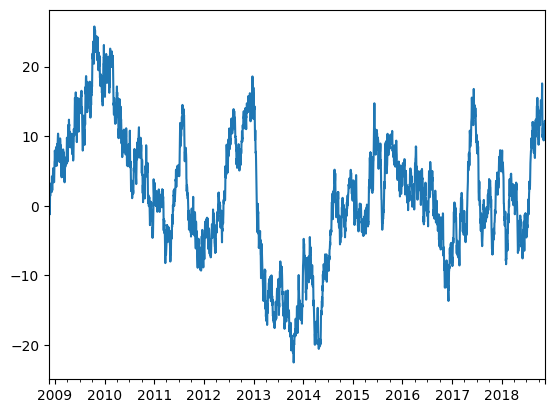

In [127]:
ts.plot()

In [129]:
ts["2014-01-01":"2016-01-01"] = np.nan

<Axes: >

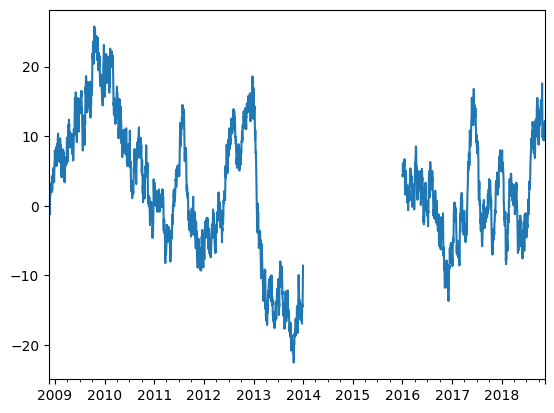

In [130]:
ts.plot()

In [131]:
rolling_avg = ts.rolling(window=90).mean()
rolling_avg

2008-11-18          NaN
2008-11-19          NaN
2008-11-20          NaN
2008-11-21          NaN
2008-11-22          NaN
                ...    
2018-11-11    11.635529
2018-11-12    11.642097
2018-11-13    11.638485
2018-11-14    11.640412
2018-11-15    11.639177
Freq: D, Length: 3650, dtype: float64

<Axes: >

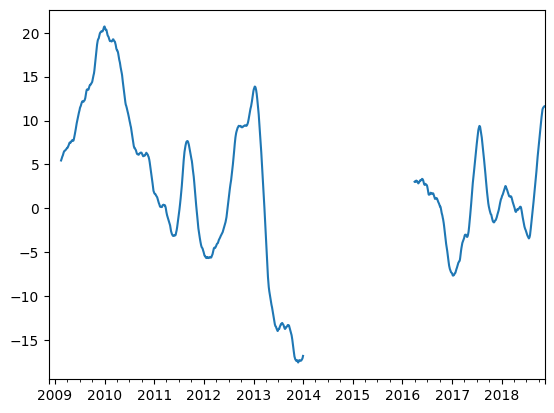

In [132]:
rolling_avg.plot()

## File operations

In [ ]:
# CSV
# Writing to a csv file.

In [133]:
df.to_csv("testing.csv")

In [ ]:
# Reading from csv


In [134]:
new_df = pd.read_csv("testing.csv", index_col=0)
new_df.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


In [ ]:
# Excel

In [136]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]


In [137]:
# this will raise an error if 'openpyxl' package is not installed
df.to_excel('myx.xlsx', sheet_name='Sheet1')


In [138]:
df6=pd.read_excel('myx.xlsx', 'Sheet1', index_col=0, na_values=['NA'])

In [139]:
df6.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


---

[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)